In [95]:
#import dependences
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime as dt
%matplotlib inline
import plotly.graph_objects as go
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '${:,.2f}'.format

In [97]:
# set date time
start = dt.datetime(2021,1,1)
end = dt.datetime.now()
# cel price data
cel = web.DataReader('CEL-USD', 'yahoo', start, end)
cel

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,$5.63,$5.34,$5.46,$5.47,"$11,705,056.00",$5.47
2021-01-02,$6.14,$5.42,$5.47,$6.00,"$18,752,209.00",$6.00
2021-01-03,$6.79,$5.92,$6.01,$6.49,"$30,908,871.00",$6.49
2021-01-04,$6.80,$5.83,$6.49,$6.00,"$22,323,042.00",$6.00
2021-01-05,$6.18,$5.63,$5.98,$6.06,"$18,803,408.00",$6.06
...,...,...,...,...,...,...
2021-08-31,$5.74,$5.49,$5.50,$5.72,"$8,578,096.00",$5.72
2021-09-01,$6.01,$5.51,$5.71,$5.84,"$13,722,043.00",$5.84
2021-09-02,$6.49,$5.82,$5.84,$6.40,"$18,755,079.00",$6.40


In [98]:
# reset the index for use of prohet library
cel.reset_index(level=0, inplace=True)
cel.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-01-01,$5.63,$5.34,$5.46,$5.47,"$11,705,056.00",$5.47
1,2021-01-02,$6.14,$5.42,$5.47,$6.00,"$18,752,209.00",$6.00
2,2021-01-03,$6.79,$5.92,$6.01,$6.49,"$30,908,871.00",$6.49
3,2021-01-04,$6.80,$5.83,$6.49,$6.00,"$22,323,042.00",$6.00
4,2021-01-05,$6.18,$5.63,$5.98,$6.06,"$18,803,408.00",$6.06


In [99]:
# drop columns that are not needed
cel.drop(columns=['High', 'Low', 'Open', 'Volume', 'Close'], inplace=True)
cel.head()

,Date,Adj Close
0,2021-01-01,$5.47
1,2021-01-02,$6.00
2,2021-01-03,$6.49
3,2021-01-04,$6.00
4,2021-01-05,$6.06


In [100]:
# set columns for prophet library 
cel.columns = ['ds', 'y']
cel.head()

,ds,y
0,2021-01-01,$5.47
1,2021-01-02,$6.00
2,2021-01-03,$6.49
3,2021-01-04,$6.00
4,2021-01-05,$6.06


In [101]:
# Train model
m = Prophet(interval_width=0.95, yearly_seasonality=True)
model = m.fit(cel)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [102]:
# Forecast
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,$5.60,$5.54,$7.27,$5.60,$5.60,$0.78,$0.78,$0.78,$0.02,$0.02,$0.02,$0.76,$0.76,$0.76,$0.00,$0.00,$0.00,$6.39
1,2021-01-02,$5.61,$5.38,$7.06,$5.61,$5.61,$0.62,$0.62,$0.62,$-0.00,$-0.00,$-0.00,$0.62,$0.62,$0.62,$0.00,$0.00,$0.00,$6.22
2,2021-01-03,$5.61,$5.25,$6.96,$5.61,$5.61,$0.47,$0.47,$0.47,$-0.01,$-0.01,$-0.01,$0.48,$0.48,$0.48,$0.00,$0.00,$0.00,$6.08
3,2021-01-04,$5.62,$5.05,$6.75,$5.62,$5.62,$0.30,$0.30,$0.30,$-0.04,$-0.04,$-0.04,$0.33,$0.33,$0.33,$0.00,$0.00,$0.00,$5.91
4,2021-01-05,$5.62,$5.02,$6.69,$5.62,$5.62,$0.18,$0.18,$0.18,$-0.01,$-0.01,$-0.01,$0.19,$0.19,$0.19,$0.00,$0.00,$0.00,$5.80


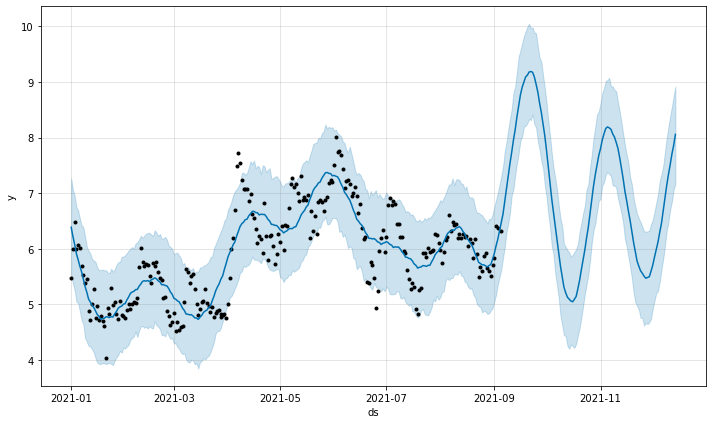

In [108]:
plot1 = m.plot(forecast)
plot1.savefig('cel_forecast.png')

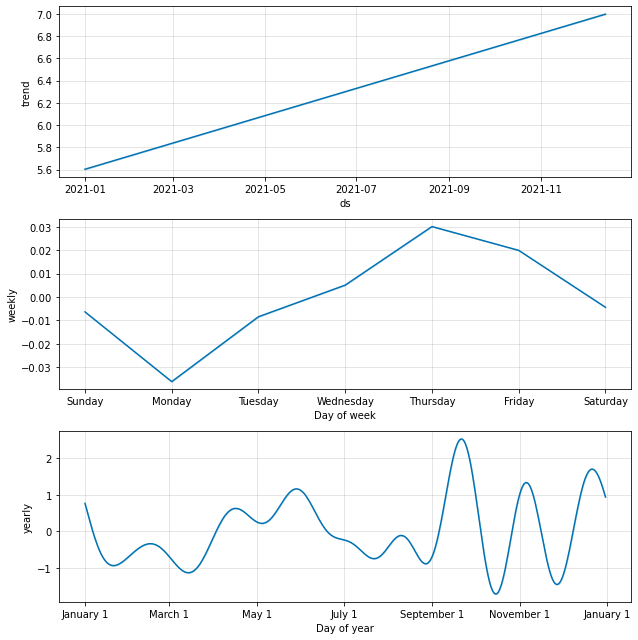

In [110]:
plt2 = m.plot_components(forecast)
plt2.savefig('cel_forecast2.png')